In [1158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [956]:
df_original = pd.read_csv('./Datasets/bank.csv')

In [957]:
df = df_original.copy()

In [958]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [959]:
df.shape

(11162, 17)

In [960]:
df.duplicated().sum()

0

In [961]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [962]:
# check value counts in cat cols
for col in cat_cols:
    print(col, '*')
    print(df[col].value_counts())
    print('*'*50)

job *
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
**************************************************
marital *
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
**************************************************
education *
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
**************************************************
default *
no     10994
yes      168
Name: default, dtype: int64
**************************************************
housing *
no     5881
yes    5281
Name: housing, dtype: int64
**************************************************
loan *
no     9702
yes    1460
Name: loan, dtype: int64
**************************************************
contact *
cellu

In [963]:
# check value counts in num cols
for col in num_cols:
    print(col, '*')
    print(df[col].value_counts().head(10))
    print('*'*50)

age *
31    496
32    477
34    466
33    464
35    461
30    456
36    432
37    370
38    353
39    343
Name: age, dtype: int64
**************************************************
balance *
0     774
1      39
3      35
2      34
4      29
5      27
19     20
8      19
62     18
61     17
Name: balance, dtype: int64
**************************************************
day *
20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
Name: day, dtype: int64
**************************************************
duration *
97     39
161    38
119    37
158    37
150    37
114    36
144    36
136    35
131    35
90     35
Name: duration, dtype: int64
**************************************************
campaign *
1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
Name: campaign, dtype: int64
**************************************************
pdays *
-1      8324
 92      106
 182      89
 91       

- Seems like previous -  doest not add any value to target
- campaign can be considered categorical
- most clients are contacted -1 days after the previous campaign

In [964]:
# drop previous

df.drop('previous', inplace=True, axis=1)

In [965]:
cat_cols = df.select_dtypes(exclude='int64').columns
num_cols = df.select_dtypes(include='int64').columns


In [966]:
# check for null
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
poutcome     0
deposit      0
dtype: int64

No Null values noted

# univarient analysis - num cols

In [967]:
def univarient_num(col):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    sns.histplot(data=df, x=col, kde=True,hue='deposit',ax=ax[0])
    ax[0].set_xlabel(col)
    
    sns.boxplot(data=df,x=col, ax=ax[1])
    ax[1].set_xlabel(col)


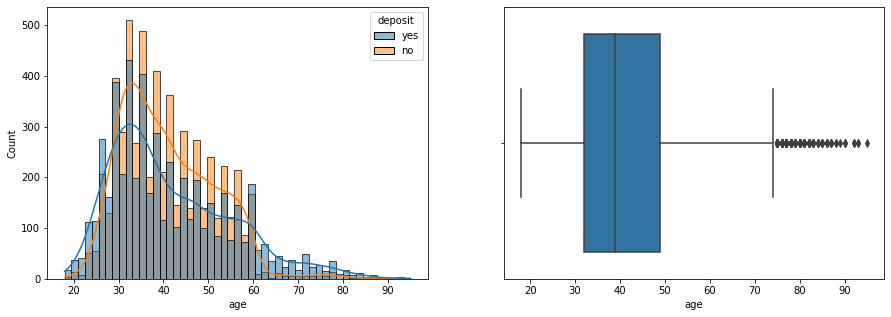

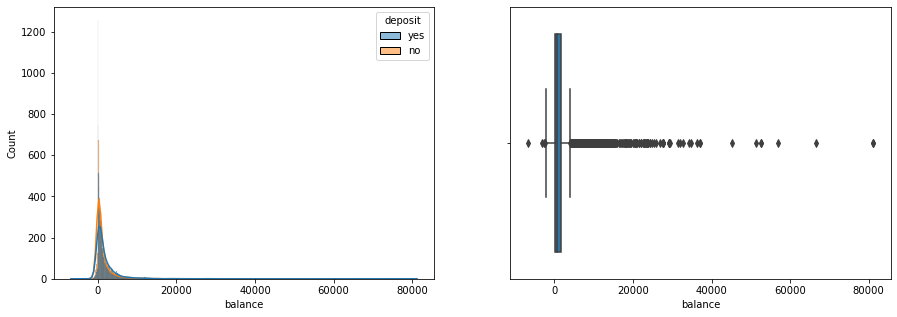

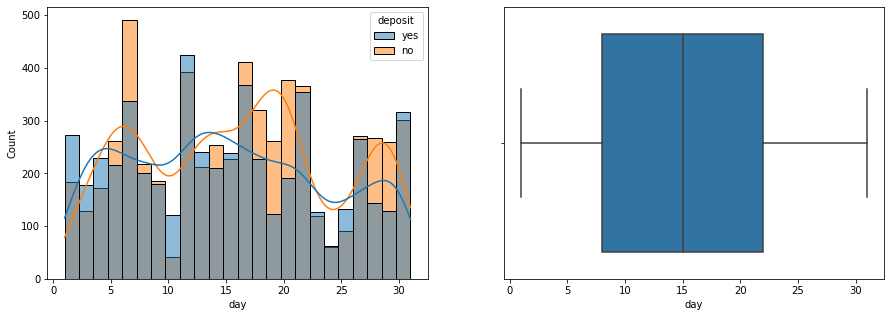

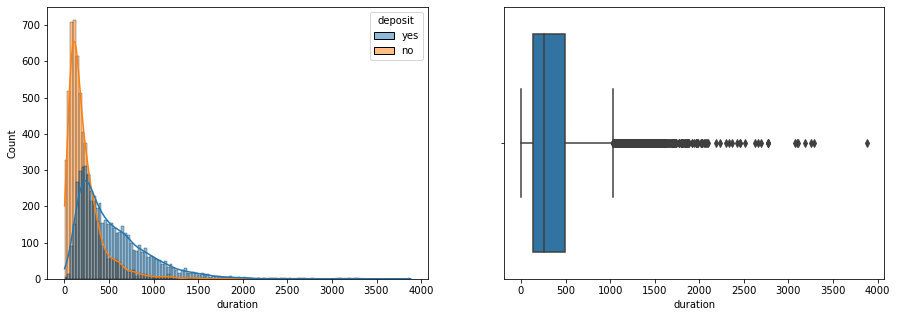

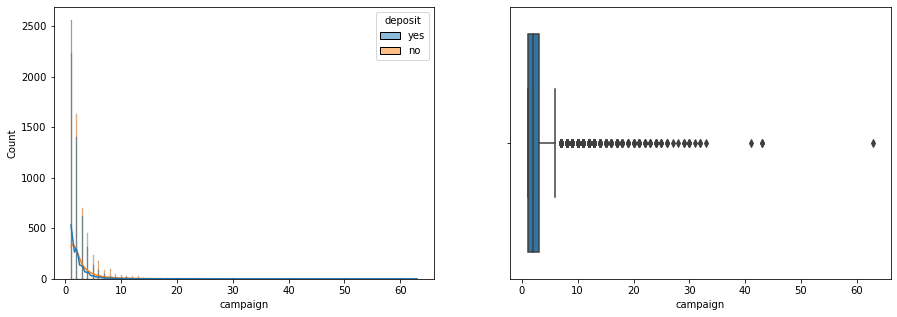

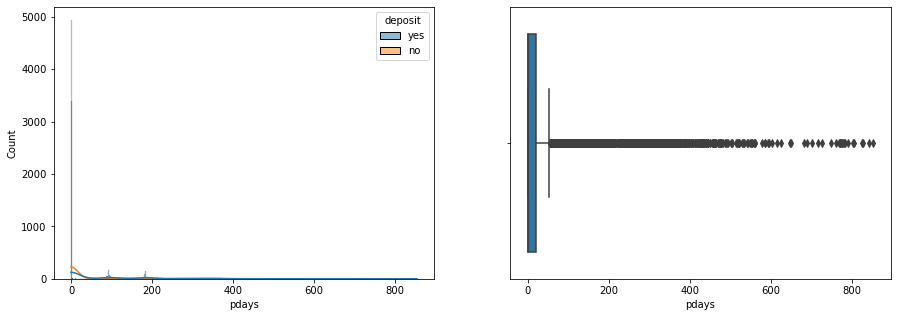

In [968]:
for i in num_cols:
    univarient_num(i)

In [969]:
np.mean(df.age)

41.231947679627304

there are potential outliers in num cols except day

In [970]:
num_outliers = [i for i  in num_cols if i not in ['day']] 
num_outliers

['age', 'balance', 'duration', 'campaign', 'pdays']

In [971]:
# handling outliers - Z score

# for col in num_outliers:
#     outliers = []
#     for i in df[col]:
#         z = (i-np.mean(df[col]))/np.std(df[col])
#         if abs(z) > 3:
#             outliers.append(i)
#     df.loc[df[col] >= np.array(outliers).min(), col] = df[col].mean()

for col in num_outliers:
    q1 = df[col].quantile(0.25)   
    q3 = df[col].quantile(0.75)             
    IQR = q3 - q1
    lower = q1 - (1.5 * IQR)
    upper = q3 + (1.5 * IQR)
    if(col in ['age', 'balance', 'duration']):
        df.loc[(df[col] < round(lower)) | (df[col] >= round(upper)), col] = df[col].mean()
#         df = df[(df[col] >= lower) & (df[col] <= upper)]
    print(col, upper, lower)

age 74.5 6.5
balance 4087.0 -2257.0
duration 1033.0 -399.0
campaign 6.0 -2.0
pdays 53.375 -33.625


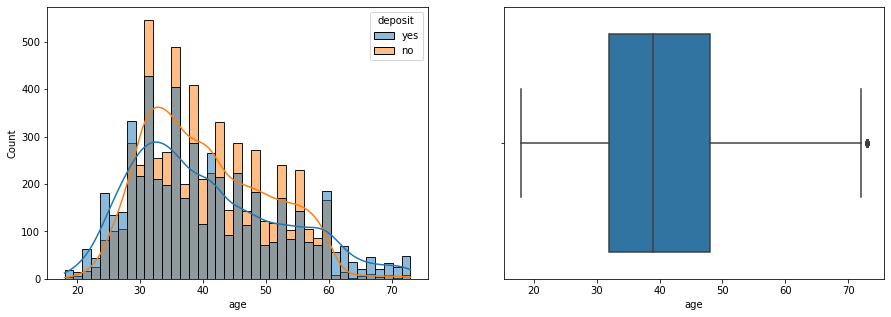

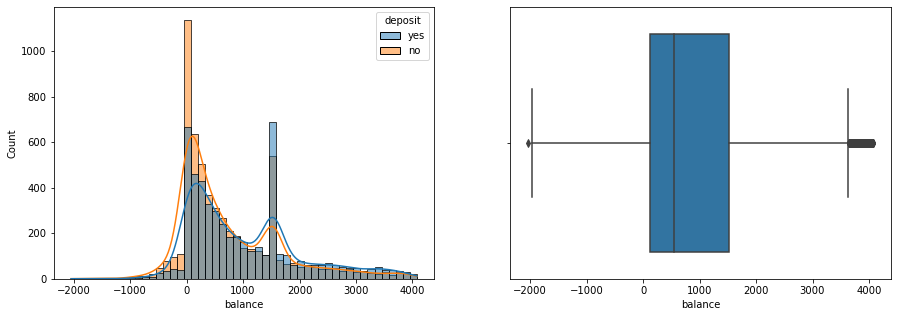

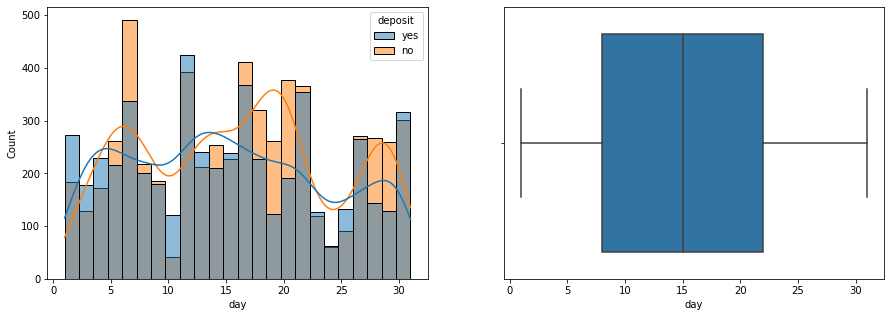

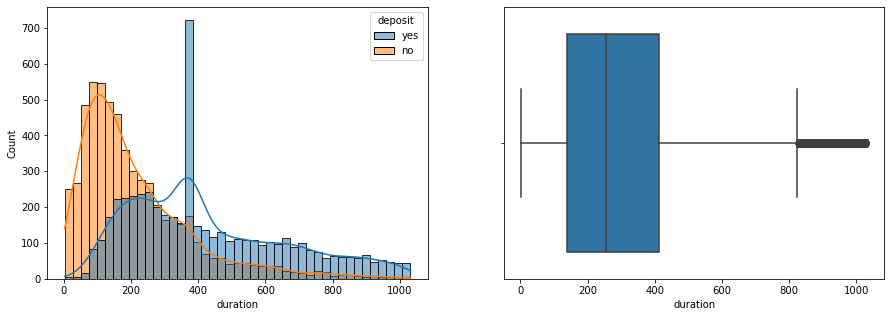

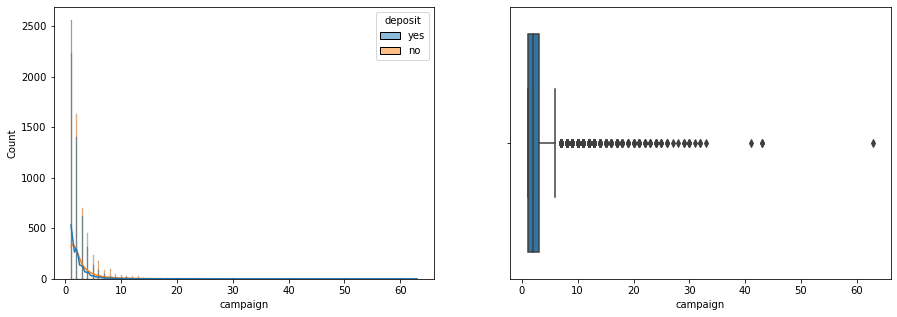

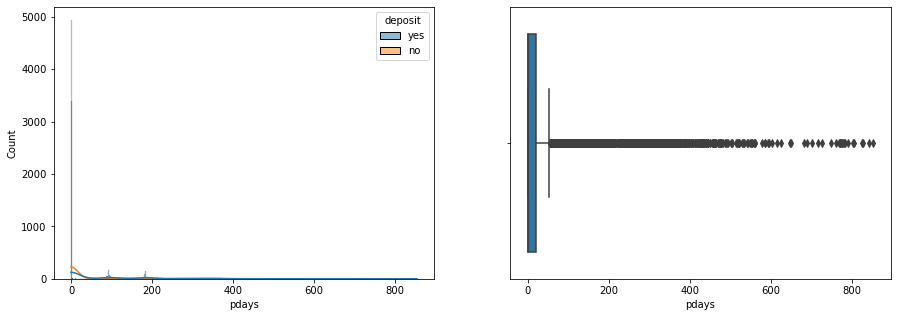

In [972]:
for i in num_cols:
    univarient_num(i)

In [973]:
# Manually handlled few outliers 

df.loc[df.pdays > 53.37, 'pdays'] = -1

df.loc[df.duration > 820, 'duration'] = df.duration.mode()

df.loc[df.balance > 3800, 'balance'] = df.duration.mode()

- considered mode for filling remaining outliers 
- ignoring outliers for campign

# univarient analysis on cat col

In [974]:
def univarient_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    sns.countplot(data=df, x=col, ax=ax[0], hue='deposit')
    ax[0].set_xlabel(col)
#     plt.xticks(size = 10)
    ax[0].tick_params(axis='x', labelrotation=45)
    
    ax[1].pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%')
    ax[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()


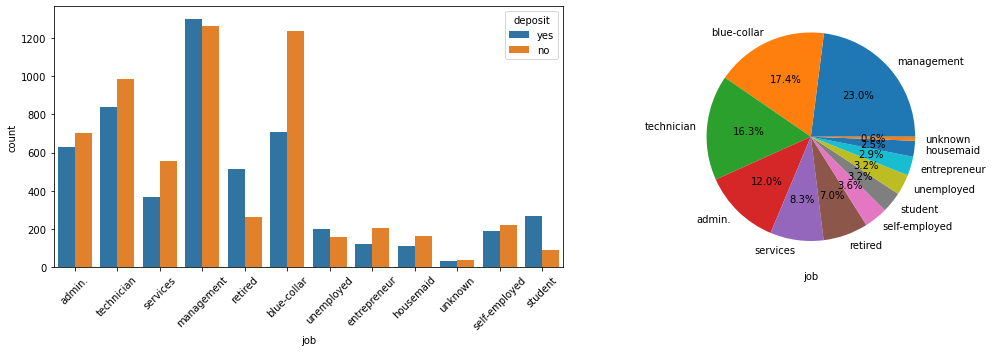

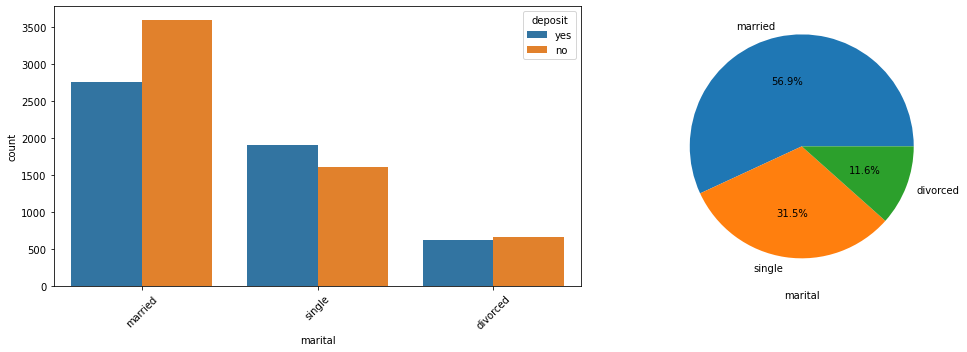

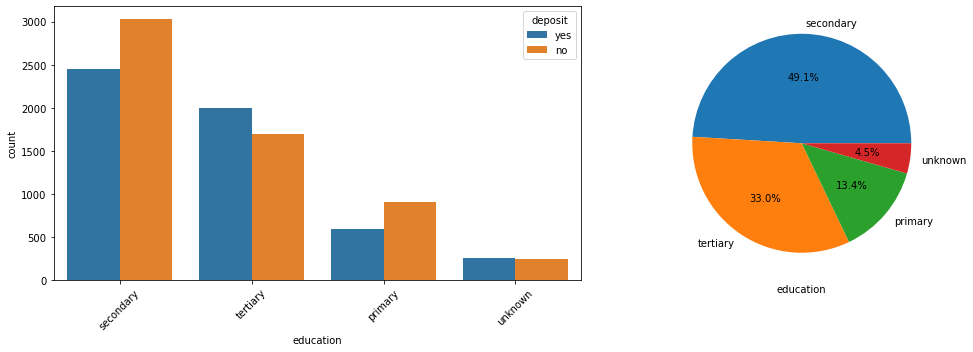

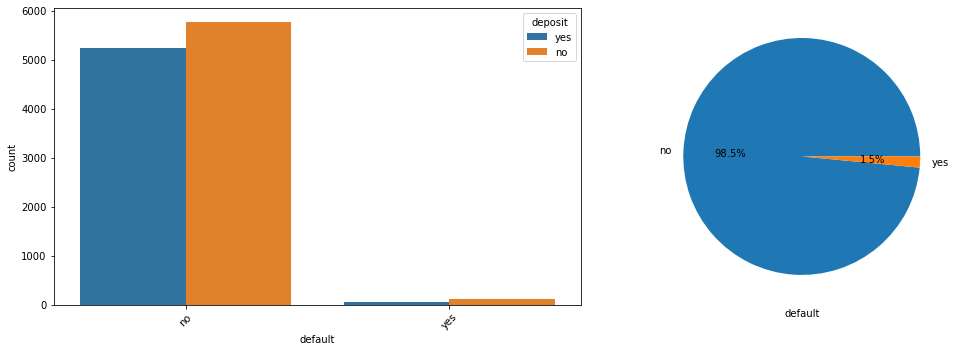

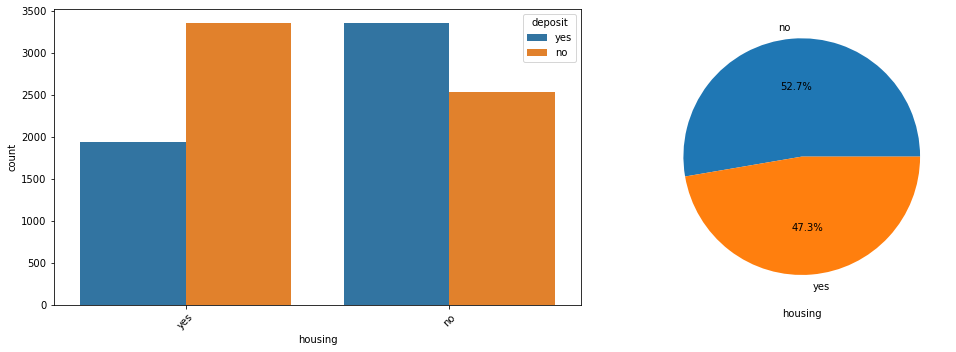

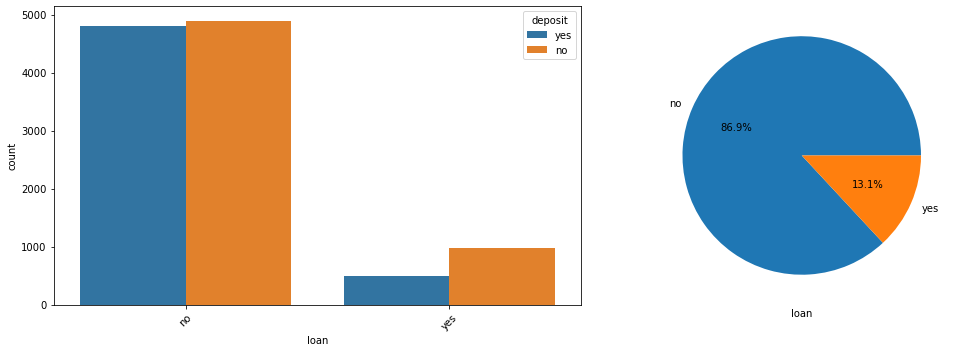

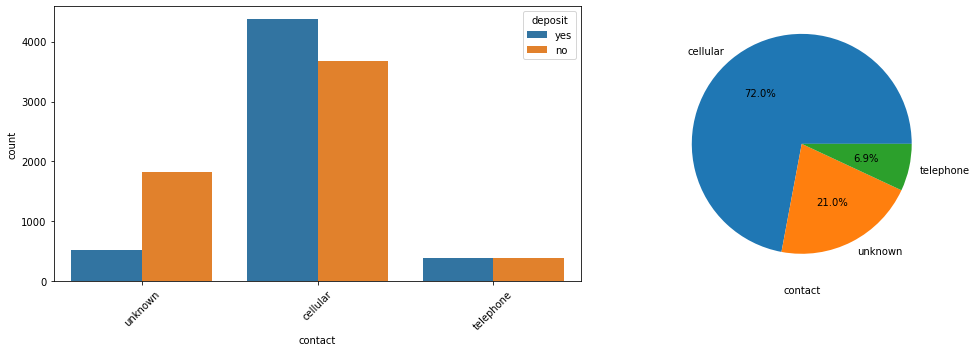

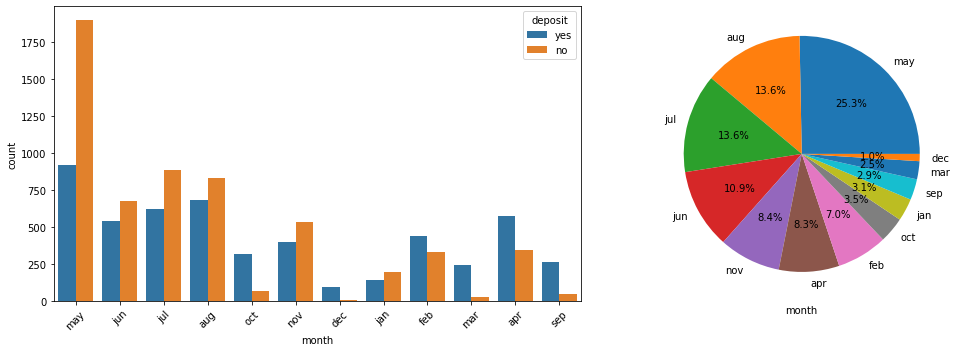

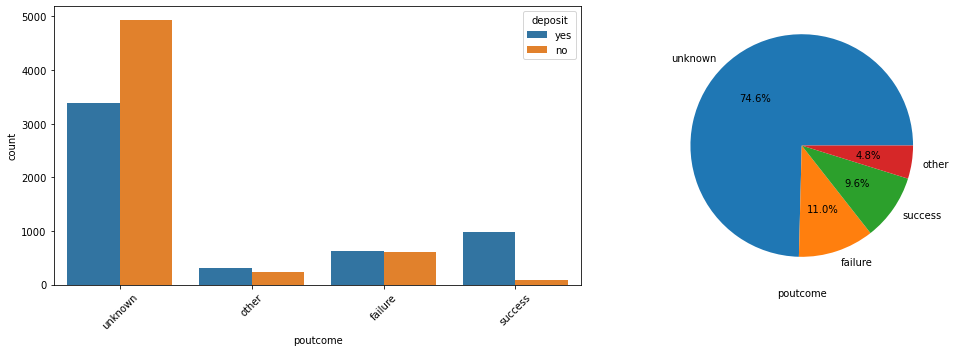

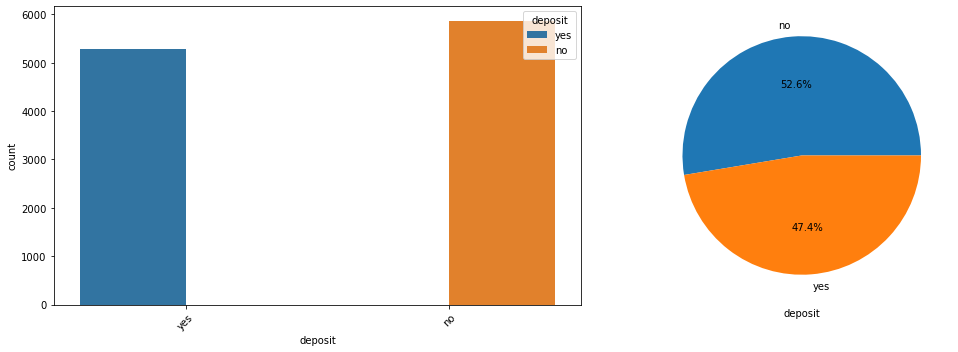

In [975]:
for col in cat_cols:
    univarient_cat(col)

- 98% of the ppl not defaulters and there is a good chance that they will deposit if they are not defauter 
- 89% of ppl does not have loan and ppl with no loan will mostly deposit and 50% of ppl having loan do not deposit
- in the month of may almost 50% of ppl have not deposited
- more than 50% of students and retaired clients have deposited
- ppl having house tend to not deposit unlike ppl without house tend to deposit

loan                      no         yes
deposit default                         
no      no        772.245705  547.763840
        yes        11.642412  -80.749083
yes     no       1041.475920  633.574867
        yes       -82.108108  -10.666667

In [752]:
# analising numeric col with target


# df.groupby(['deposit','']).balance.max()

pd.pivot_table(df[df.default == 'yes']index='deposit', )

deposit  age 
no       18.0       5.0
         19.0      60.0
         20.0    2764.0
         21.0    2265.0
         22.0    3317.0
                  ...  
yes      69.0    3588.0
         70.0    2795.0
         71.0    3561.0
         72.0    3561.0
         73.0    3443.0
Name: balance, Length: 114, dtype: float64

In [745]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,371.993818,1,-1,unknown,yes
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5,may,371.993818,1,-1,unknown,yes
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,371.993818,1,-1,unknown,yes
3,55.0,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579.000000,1,-1,unknown,yes
4,54.0,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673.000000,2,-1,unknown,yes


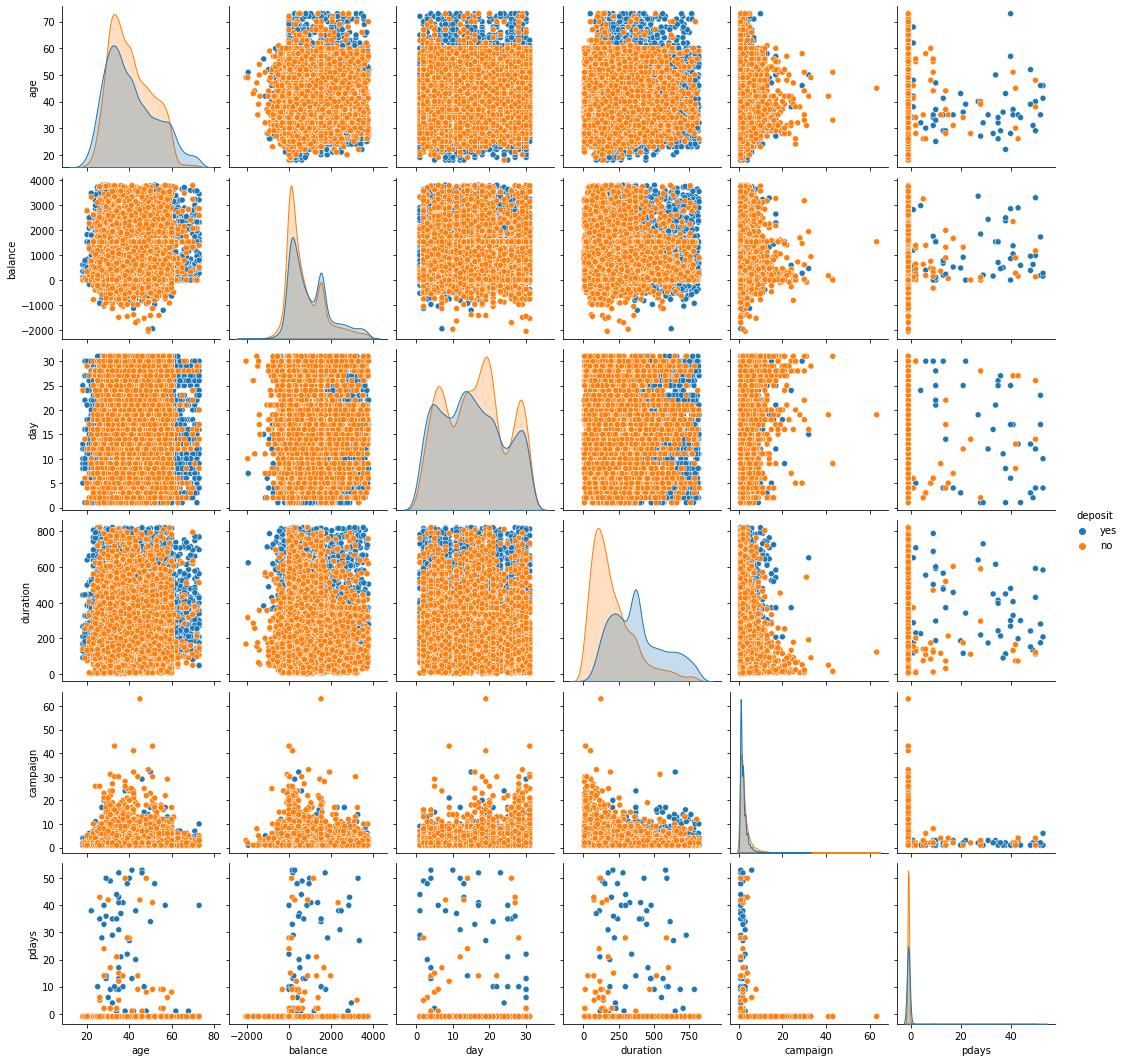

In [976]:
sns.pairplot(df, hue='deposit')

- ppl who are contacted for less duration tends to not deposit
- ppl with less balace tend to not deposit 
- higher age ppl not deposit

In [1159]:
# encoding -  label encoding seems to be good choice as variables are ordinal
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [978]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
lb = LabelEncoder()
sd  = StandardScaler()

In [979]:
for col in cat_cols:
    df[col] = lb.fit_transform(df[col])

In [980]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,deposit
0,59.0,0,1,1,0,2343.0,1,0,2,5,8,371.993818,1,-1,3,1
1,56.0,0,1,1,0,45.0,0,0,2,5,8,371.993818,1,-1,3,1
2,41.0,9,1,1,0,1270.0,1,0,2,5,8,371.993818,1,-1,3,1
3,55.0,7,1,1,0,2476.0,1,0,2,5,8,579.000000,1,-1,3,1
4,54.0,0,1,2,0,184.0,0,0,2,5,8,673.000000,2,-1,3,1


In [981]:
X = df.drop('deposit', axis = 1)
y = df['deposit']

In [982]:
# imputing missing values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data
X['balance'] = imputer.fit_transform(X[['balance']])
X['duration'] = imputer.fit_transform(X[['duration']])


In [983]:
X.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
poutcome     0
dtype: int64

In [1218]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [985]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [986]:
Xtrain.shape

(8371, 15)

In [987]:
Xtest.shape

(2791, 15)

In [988]:
# Scaling
Xtrain = sd.fit_transform(Xtrain)
Xtest = sd.fit_transform(Xtest)

In [989]:
from sklearn.tree import DecisionTreeClassifier

In [990]:
dtc = DecisionTreeClassifier(random_state=3, max_depth = 4)
dtc.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=4, random_state=3)

In [991]:
ytrain_pred = dtc.predict(Xtrain)
ytest_pred = dtc.predict(Xtest)

In [992]:
print(f'Tesing accuracy score- {accuracy_score(ytest, ytest_pred)} \nTraining accuracy score- {accuracy_score(ytrain, ytrain_pred)}')


Tesing accuracy score- 0.7495521318523827 
Training accuracy score- 0.7764902640066897


In [993]:
params = {
#     'n_estimator' = [10, 20, 30, 50, 100]
    'max_depth': [2,3,4,5,6,7,10,12],
#     'bootstra p' = [True, False]
    'criterion': ['gini','entropy'],
    'max_features': ['sqrt', 'log2']
}

In [994]:
cv_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv = 5)

In [995]:
cv_dt.fit(Xtest, ytest)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 10, 12],
                         'max_features': ['sqrt', 'log2']})

In [996]:
cv_dt.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2'}

In [997]:
cv_dt.best_score_

0.7595924622181187

In [998]:
dtc.set_params(criterion='gini',max_features='sqrt', max_depth = 5)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=3)

In [999]:
dtc.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=3)

In [1000]:
ytrain_pred_2 = dtc.predict(Xtrain)

In [1001]:
accuracy_score(ytest, ytest_pred_2)

0.7208885704048728

# Applying Random forest classifier

In [1047]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)

In [1042]:
params_rf = {
    'bootstrap' : [True, False],
    'max_depth' : [2,3,4,5,6,7,8,9],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['sqrt', 'log2']
}

In [1048]:
rfc_cv = GridSearchCV(rfc, param_grid=params_rf, n_jobs=-1, scoring='accuracy')

In [1049]:
rfc_cv.fit(Xtrain, ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy')

In [1050]:
rfc_cv.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt'}

In [1051]:
rfc_cv.best_score_

0.8196148290804045

In [1052]:
rfc.set_params(criterion='gini', max_depth=9, max_features='sqrt')

RandomForestClassifier(max_depth=9, random_state=1)

In [1053]:
rfc.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=9, random_state=1)

In [1054]:
ytrain_pred_rf = rfc.predict(Xtrain)

In [1055]:
accuracy_score(ytrain, ytrain_pred_rf)

0.8583203918289333

In [1057]:
ytest_pred_rf = rfc.predict(Xtest)
accuracy_score(ytest, ytest_pred_rf)

0.7857398781798638

In [1058]:
# Choosing n_estimators considering minimum obb_err
rfc.set_params(oob_score = True, bootstrap = True)
min_estimators = 100
max_estimators = 500
oob_error_val = {}
for i in range(min_estimators, max_estimators):
    rfc.set_params(n_estimators = i)
    rfc.fit(Xtrain, ytrain)
    oob_error_val[i] = 1 - rfc.oob_score_

In [1061]:
oob_series = pd.Series(oob_error_val)

100    0.182654
101    0.182415
102    0.182057
103    0.182415
104    0.182535
         ...   
495    0.183491
496    0.183730
497    0.183849
498    0.183849
499    0.183610
Length: 400, dtype: float64

<AxesSubplot:>

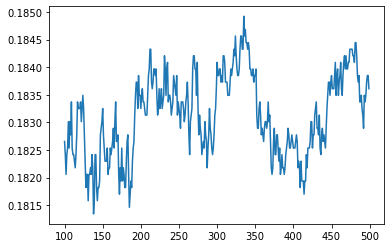

In [1066]:
sns.lineplot(data = oob_series)

In [1085]:
oob_series[oob_series == oob_series.min()].index[0]

138

- n_estimators  = 138 where the value of error is min()

In [1087]:
rfc.set_params(n_estimators=138, oob_score = False, bootstrap=False)

RandomForestClassifier(bootstrap=False, max_depth=9, n_estimators=138,
                       random_state=1)

In [1088]:
rfc.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=False, max_depth=9, n_estimators=138,
                       random_state=1)

In [1089]:
ytest_pred_rf = rfc.predict(Xtest)
accuracy_score(ytest, ytest_pred_rf)

0.7821569329989251

In [1090]:
ytrain_pred_rf = rfc.predict(Xtrain)
accuracy_score(ytrain, ytrain_pred_rf)

0.8641739338191375

In [1127]:
#selecting important features based on Mean Decrease in Impurity and getting their indexes 
importances = rfc.feature_importances_
indices_rf = np.argsort(importances)

In [1128]:
# getting input features
cols = X.columns

In [1136]:
imp_cols = []
for i in indices_rf:
    imp_cols.append(cols[i])

In [1132]:
a = dict(zip(sorted_cols, importances))

In [1133]:
b = pd.Series(a)
b.sort_values(inplace=True)

<AxesSubplot:>

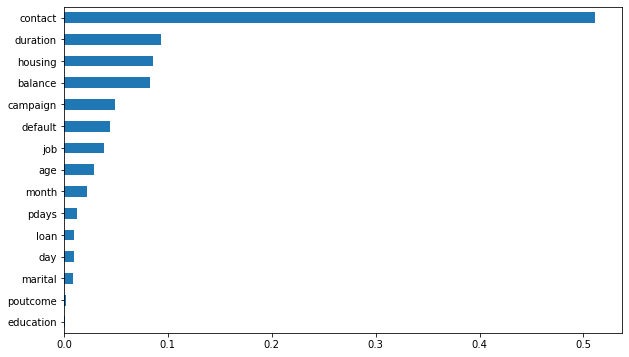

In [1135]:
fig, ax = plt.subplots(figsize=(10,6))
b.plot(kind='barh')

In [1143]:
accuracy_rf = rfc.score(Xtest,ytest)
print("Here our Accuracy of model is: %0.5f"%accuracy_rf)

Here our Accuracy of model is: 0.78216


In [1144]:
test_error_rate_rf = 1-accuracy_rf
print("error rate of our model is: %0.5f"%test_error_rate_rf)

error rate of our model is: 0.21784


In [1284]:
from sklearn.metrics import roc_curve, auc, classification_report, roc_auc_score

In [1148]:
predictions_prob = rfc.predict_proba(Xtest)[:, 1]

fpr2, tpr2, _ = roc_curve(ytest,
                          predictions_prob,
                          pos_label = 1)

In [1154]:
auc = auc(fpr2,tpr2)

Text(0.5, 1.0, 'ROC Curve For Random Forest (AUC =  0.875)')

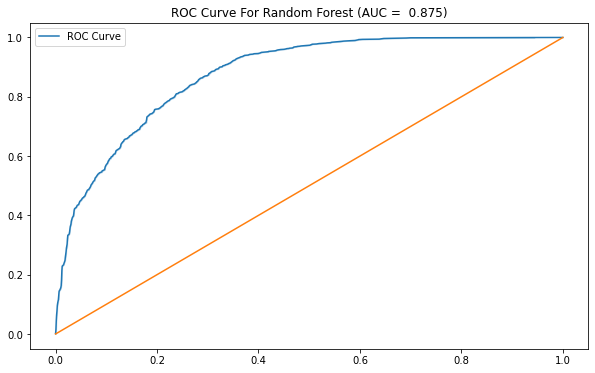

In [1155]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x=fpr2, y= tpr2, label = 'ROC Curve')
plt.plot([0, 1])
plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
            .format('Random Forest', auc))

In [1157]:
print(classification_report(rfc.predict(Xtest), ytest))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1392
           1       0.79      0.76      0.78      1399

    accuracy                           0.78      2791
   macro avg       0.78      0.78      0.78      2791
weighted avg       0.78      0.78      0.78      2791



# Using boosting algorithms Ada and XG boost

In [1160]:
from sklearn.ensemble import AdaBoostClassifier

In [1176]:
adaboost = AdaBoostClassifier(random_state=1, learning_rate=0.1)

In [1177]:
adaboost.fit(Xtrain, ytrain)

AdaBoostClassifier(learning_rate=0.1, random_state=1)

In [1178]:
ytest_pred_ada = adaboost.predict(Xtest)
adaboost.score(Xtest, ytest)

0.7370118237190971

In [1181]:
# selecting best learning rate

ada_cv = GridSearchCV(adaboost, param_grid={'learning_rate':[ 0.2, 0.4, 0.6, 0.8, 1, 1.5, 2]}, scoring='accuracy', cv=3)

In [1182]:
ada_cv.fit(Xtrain, ytrain)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(learning_rate=0.1, random_state=1),
             param_grid={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.5, 2]},
             scoring='accuracy')

In [1183]:
ada_cv.best_params_

{'learning_rate': 1.5}

In [1185]:
adaboost.set_params(learning_rate=1.5)

AdaBoostClassifier(learning_rate=1.5, random_state=1)

In [1187]:
adaboost.fit(Xtrain, ytrain)

AdaBoostClassifier(learning_rate=1.5, random_state=1)

In [1290]:
ytest_pred_ada = adaboost.predict(Xtest)

In [1292]:
roc_auc_score(ytest, ytest_pred_ada)

0.7621221939365888

In [1293]:
auc(fpr3, tpr3)

0.8596626295353442

In [1199]:
predictions_prob_ada = adaboost.predict_proba(Xtest)[:, 1]
fpr3, tpr3, _ = roc_curve(ytest, predictions_prob_ada, pos_label = 1)
auc_ada = auc(fpr3, tpr3)

Text(0.5, 1.0, 'ROC Curve For Ada boost (AUC =  0.860)')

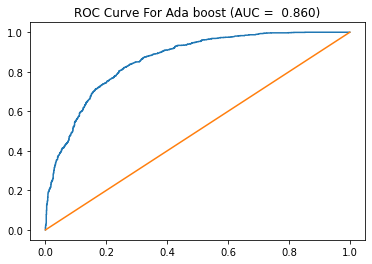

In [1200]:
plt.plot(fpr3, tpr3)
plt.plot([0,1])
plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
            .format('Ada boost', auc_ada))

# Gradient boost

In [1263]:
from sklearn.ensemble import GradientBoostingClassifier

In [1264]:
grdboost = GradientBoostingClassifier(random_state=1)

In [1265]:
grd_cv = GridSearchCV(grdboost, param_grid={'learning_rate': np.linspace(0, 0.1, 10), 'max_depth': [4, 5, 6]})

In [1266]:
grd_cv.fit(Xtrain, ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
       0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ]),
                         'max_depth': [4, 5, 6]})

In [1269]:
grd_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 5}

In [1270]:
grd_cv.best_score_

0.8525861017493179

In [1271]:
grdboost.set_params(learning_rate=0.1, max_depth = 5)

GradientBoostingClassifier(max_depth=5, random_state=1)

In [1272]:
grdboost.fit(Xtrain, ytrain)

GradientBoostingClassifier(max_depth=5, random_state=1)

In [1273]:
ytest_pred_grd = grdboost.predict(Xtest)

In [1275]:
ytest_proba_grd = grdboost.predict_proba(Xtest)[:, 1]

In [1277]:
fpr4, tpr4, _  = roc_curve(ytest, ytest_proba_grd)

In [1286]:
auc_grd = auc(fpr4, tpr4)
roc_auc_score(ytest, ytest_proba_grd)

0.8850379284630615

In [1287]:
auc_grd

0.8850379284630615

Text(0.5, 1.0, 'ROC Curve for Gradient Boost (AUC =  0.885)')

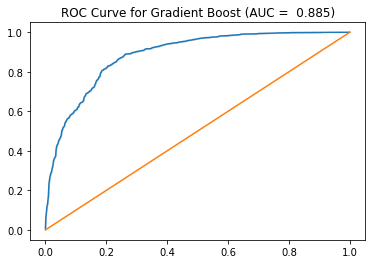

In [1282]:
sns.lineplot(x=fpr4, y=tpr4)
plt.plot([0,1])
plt.title(f'ROC Curve for Gradient Boost (AUC = {auc_grd : 0.3f})')

# Gradient boost has outperformed all the models with successful prediction rate of 88%

In [1296]:
print(classification_report(ytest, ytest_pred_grd))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1450
           1       0.81      0.72      0.76      1341

    accuracy                           0.78      2791
   macro avg       0.79      0.78      0.78      2791
weighted avg       0.79      0.78      0.78      2791

